<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [3]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [4]:
import warnings

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# Your code with future warnings here

# Reset warnings to default behavior (optional)
#warnings.resetwarnings()

We will import the following libraries for the lab


In [5]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score

This function is to plot the confusion matrix.


In [6]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [7]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [8]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [9]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [10]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [11]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [12]:
# students get this 
transform = preprocessing.StandardScaler()
X = pd.DataFrame(transform.fit_transform(X),columns=X.columns)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


In [13]:
X

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,-1.712912,-1.948145e-16,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
1,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
2,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,1.812654,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
3,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
4,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.973440,-0.106,-0.106,1.527525,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,1.991005e+00,0.174991,0.945537,0.202528,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,5.385165,-0.106000,-0.534522,0.534522,-1.196843,1.196843,-0.517306,0.517306
86,1.597434,1.991005e+00,1.003894,0.945537,0.202528,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,5.385165,-0.215666,-0.185695,-0.106000,-0.534522,0.534522,-1.196843,1.196843,-0.517306,0.517306
87,1.635927,1.991005e+00,3.490605,0.945537,1.966480,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,-0.534522,0.534522,-1.196843,1.196843,-0.517306,0.517306
88,1.674419,1.991005e+00,1.003894,0.945537,0.202528,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,5.385165,-0.106000,-0.534522,0.534522,-1.196843,1.196843,-0.517306,0.517306


## Evaluate for all model by different random states


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [14]:

results = pd.DataFrame(columns = ['Random State','Models','Accuracy train','Accuracy test'])
    
for rs in range(0,20):
    print("Random State:", rs)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=rs)
    parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
    parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs','liblinear','newton-cg']}# l1 lasso l2 ridge
    lr=LogisticRegression()
    
    logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
    
    # Fit the model to the training data
    logreg_cv.fit(X_train, Y_train)
    
    
    
    parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
    svm = SVC()
    svm_cv = GridSearchCV(estimator = svm, param_grid = parameters, cv = 10)
    svm_cv.fit(X_train,Y_train)
    
    
    parameters = {'criterion': ['gini', 'entropy'],
         'splitter': ['best', 'random'],
         'max_depth': [2*n for n in range(1,10)],
         'max_features': ['sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10]}
    
    tree = DecisionTreeClassifier()
    tree_cv = GridSearchCV(estimator=tree,param_grid=parameters,cv=10)
    tree_cv.fit(X_train,Y_train)
    
    
    parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                  'p': [1,2]}

    KNN = KNeighborsClassifier()
    knn_cv = GridSearchCV(estimator=KNN,param_grid=parameters, cv=10)
    knn_cv.fit(X_train,Y_train)
    
    
    to_append= pd.DataFrame({'Random State' : [rs,rs,rs,rs],
            'Models' : ['Logistic regression', 'SVM', 'Tree', 'KNN'],
            'Accuracy train' : [logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_],
            'Accuracy test' : [logreg_cv.score(X_test, Y_test), svm_cv.score(X_test, Y_test), tree_cv.score(X_test, Y_test),knn_cv.score(X_test, Y_test)]})
    results = results.append(to_append)
results
    

Random State: 0


/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


Random State: 1
Random State: 2
Random State: 3
Random State: 4
Random State: 5
Random State: 6
Random State: 7
Random State: 8
Random State: 9
Random State: 10
Random State: 11
Random State: 12
Random State: 13
Random State: 14
Random State: 15
Random State: 16
Random State: 17
Random State: 18
Random State: 19


,Random State,Models,Accuracy train,Accuracy test
0,0,Logistic regression,0.850000,0.833333
1,0,SVM,0.850000,0.833333
2,0,Tree,0.903571,0.777778
3,0,KNN,0.864286,0.777778
0,1,Logistic regression,0.862500,0.833333
...,...,...,...,...
3,18,KNN,0.878571,0.666667
0,19,Logistic regression,0.876786,0.722222
1,19,SVM,0.891071,0.666667
2,19,Tree,0.928571,0.722222


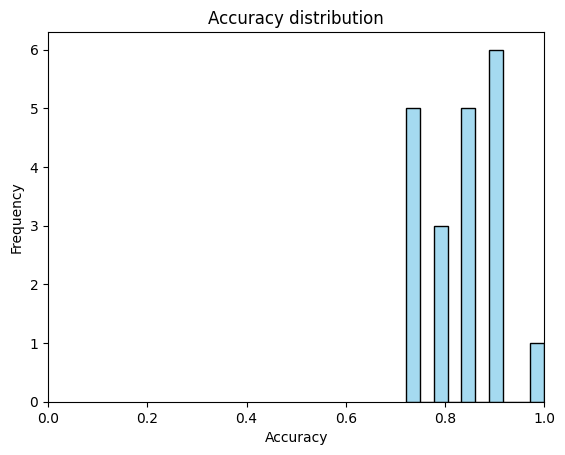

In [18]:
sns.histplot(results.loc[results['Models'] == "Logistic regression","Accuracy test"], bins=10, kde=False, color='skyblue')
# Set labels and title
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Accuracy distribution')
plt.xlim(0,1.0)

# Show the plot
plt.show()

In [19]:
from scipy.stats import t

# Create a sample DataFrame

for model_name in ["Logistic regression", "SVM", "Tree", "KNN"]:
    model_results = results.loc[results['Models'] == model_name,"Accuracy test"]
    
    # Calculate the mean and standard deviation
    mean_value = np.mean(model_results)
    std_dev = np.std(model_results, ddof=1)  # Use ddof=1 for sample standard deviation
    
    # Set the confidence level and degrees of freedom
    confidence_level = 0.95
    degrees_of_freedom = len(model_results) - 1
    
    # Calculate the margin of error
    margin_of_error = t.ppf((1 + confidence_level) / 2, degrees_of_freedom) * (std_dev / np.sqrt(len(model_results)))
    
    # Calculate the confidence interval
    lower_bound = mean_value - margin_of_error
    upper_bound = mean_value + margin_of_error
    
    # Print the results
    print(model_name)
    print(f"Mean: {mean_value}")
    print(f"Confidence Interval ({confidence_level * 100}%): ({lower_bound}, {upper_bound})")
    print("")

Logistic regression
Mean: 0.8222222222222223
Confidence Interval (95.0%): (0.7858406564492598, 0.8586037879951848)

SVM
Mean: 0.836111111111111
Confidence Interval (95.0%): (0.7918936538689263, 0.8803285683532958)

Tree
Mean: 0.7694444444444445
Confidence Interval (95.0%): (0.7207831176638582, 0.8181057712250308)

KNN
Mean: 0.8277777777777778
Confidence Interval (95.0%): (0.7920873766158454, 0.8634681789397103)



we can see we only have 18 test samples.


In [21]:
pd.set_option('display.max_rows', None)

print(results.sort_values(by=['Models','Random State'], ascending=True))
pd.reset_option('display.max_rows')


  Random State               Models  Accuracy train  Accuracy test
3            0                  KNN        0.864286       0.777778
3            1                  KNN        0.889286       0.777778
3            2                  KNN        0.848214       0.833333
3            3                  KNN        0.835714       0.944444
3            4                  KNN        0.876786       0.777778
3            5                  KNN        0.862500       0.833333
3            6                  KNN        0.823214       0.833333
3            7                  KNN        0.873214       0.722222
3            8                  KNN        0.832143       0.888889
3            9                  KNN        0.851786       0.944444
3           10                  KNN        0.860714       0.833333
3           11                  KNN        0.860714       0.888889
3           12                  KNN        0.844643       0.777778
3           13                  KNN        0.819643       0.94

Text(0, 0.5, 'Accuracy')

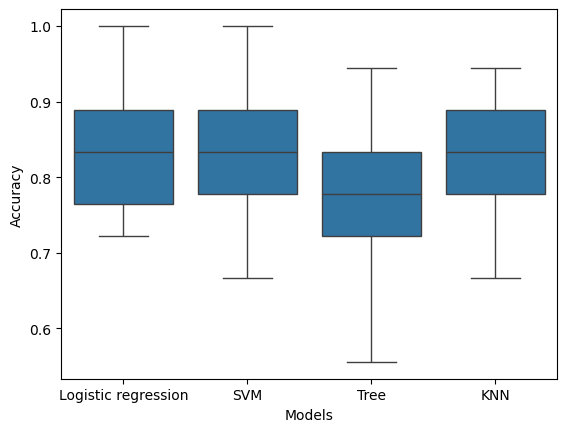

In [42]:
sns.boxplot(x='Models', y='Accuracy test', data=results)

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')


In [37]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 31.622776601683793, 'gamma': 0.001, 'kernel': 'sigmoid'}
accuracy : 0.8910714285714286


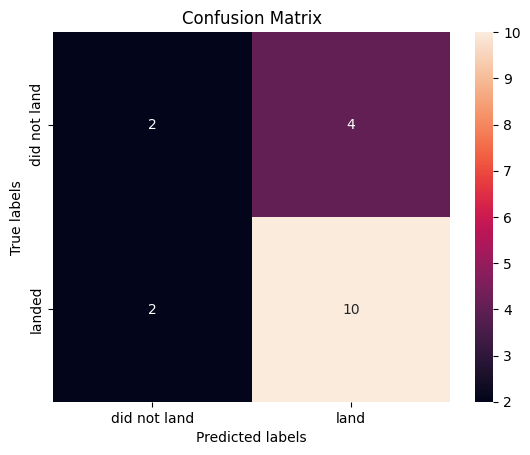

In [43]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [41]:
corr = X
corr["class"] = Y
correlation_matrix = corr.corr()

# Display the correlation matrix
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the correlation matrix
display(correlation_matrix)

# Reset display options (optional)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True,class
FlightNumber,1.000000,5.963070e-01,0.652842,0.932411,0.735193,-0.132606,1.530070e-01,-0.263658,0.014281,-0.134996,-0.285053,2.299228e-01,-1.176156e-01,1.122051e-01,0.142837,0.552268,-0.081152,0.137337,-0.055357,-0.017641,0.092847,0.343472,-0.188596,0.147205,-1.815683e-01,-0.177488,-0.173408,-0.169328,-0.165248,-0.161167,-0.157087,-0.153007,-0.148927,-0.140766,-0.144847,-0.136686,-0.132606,-0.128526,-0.124446,-0.112205,-0.120365,-0.116285,-0.108125,-0.121862,-0.099965,-0.095884,-0.091804,-0.087724,-0.083644,-0.092847,-0.071403,-0.069635,-0.046424,-0.059163,-0.049325,-0.040621,-0.042842,-0.034682,-0.020310,-0.005803,-0.014507,-0.018361,-6.120278e-03,0.002040,0.029015,0.114145,1.012613e-01,0.155653,0.250330,0.059163,0.264202,0.063243,0.197160,0.268045,0.269798,0.287106,0.181568,-0.442364,0.442364,-0.635844,0.635844,-0.373619,0.373619,4.019226e-01
PayloadMass,0.596307,1.000000e+00,0.665218,0.518165,0.612327,-0.125673,-1.673044e-17,-0.153264,-0.130668,-0.333832,-0.138229,-8.424413e-02,1.055801e-01,-9.868649e-18,-0.210141,0.846786,-0.149496,0.182937,-0.016326,-0.265277,-0.128924,0.407061,-0.127826,0.143902,2.467162e-17,-0.126694,-0.123243,-0.127262,-0.066639,-0.063120,-0.086483,-0.108734,-0.035646,-0.088300,-0.038076,-0.084236,-0.125673,-0.095520,-0.031741,-0.126059,-0.082374,-0.092432,-0.018935,-0.060934,-0.031991,-0.068228,-0.087369,-0.034170,-0.013736,0.017100,-0.011465,-0.072979,-0.030273,-0.000794,-0.117816,0.112862,0.014896,-0.127830,-0.105593,-0.029645,0.112862,-0.054605,-1.480297e-17,-0.000294,-0.152578,-0.055029,-2.305526e-02,0.221510,0.380222,-0.080194,0.307128,-0.038712,0.028755,0.168585,-0.005114,0.216980,-0.055037,-0.258011,0.258011,-0.468393,0.468393,-0.192318,0.192318,1.999916e-01
Flights,0.652842,6.652180e-01,1.000000,0.519603,0.684802,-0.069315,1.854898e-02,-0.207009,-0.069315,-0.251871,-0.189902,-1.214286e-01,-1.258705e-01,1.942762e-01,0.122857,0.761221,-0.026240,0.099534,-0.085293,-0.111492,0.026381,0.271842,-0.098581,0.014450,-6.931462e-02,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.036100,-0.069315,-0.069315,-0.069315,-0.069315,-0.069315,-0.036100,-0.069315,-0.036100,-0.036100,-0.069315,-0.036100,-0.036100,-0.069315,-0.069315,-0.036100,-0.036100,-0.036100,-0.069315,-6.931462e-02,-0.069315,-0.036100,0.127122,3.249497e-02,0.216505,0.379069,-0.069315,0.283688,-0.069315,0.127122,0.032495,0.127122,0.032495,-0.069315,-0.194457,0.194457,-0.782631,0.782631,-0.157727,0.157727,1.497871e-01
Block,0.932411,5.181647e-01,0.519603,1.000000,0.743340,-0.167044,1.002267e-01,-0.191049,0.033409,-0.124198,-0.248441,1.755818e-01,-5.836647e-02,1.002267e-01,0.168173,0.405822,-0.179590,0.179273,0.029886,0.029886,0.142545,0.308895,-0.237575,0

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
